# Pandas로 국민청원 데이터 분석하기

## Pandas와 NumPy를 import해 옵니다.

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정

plt.rc('font', family='NanumGothic')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## csv 데이터를 불러 옵니다.

In [2]:
df = pd.read_csv('../data/practice/petition.csv', parse_dates=['start', 'end'])

## 읽어온 데이터가 몇 행 몇 열인지 봅니다.
- 37만여 행, 8컬럼
- 열은 날짜, 숫자, 오브젝트 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377756 entries, 0 to 377755
Data columns (total 8 columns):
article_id    377756 non-null int64
start         377756 non-null datetime64[ns]
end           377756 non-null datetime64[ns]
answered      377756 non-null int64
votes         377756 non-null int64
category      377756 non-null object
title         377756 non-null object
content       377755 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 23.1+ MB


In [4]:
df.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


## 일부 데이터 미리 보기
* 상단 5개의 데이터를 불러옵니다.

In [5]:
df.head(2)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...


* 하단 3개의 데이터를 불러옵니다.

In [6]:
df.tail(2)

,article_id,start,end,answered,votes,category,title,content
377754,492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
377755,492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


## 결측치가 있는지 확인해 봅니다.

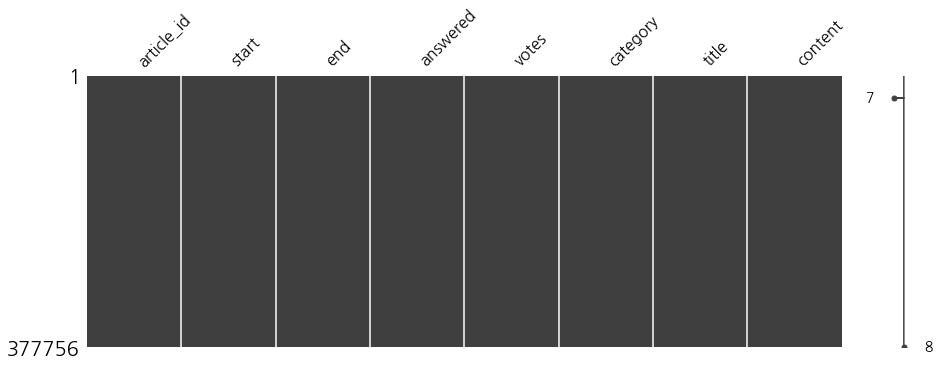

In [7]:
import missingno as msno
msno.matrix(df, figsize=(15,5))

In [8]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

## 데이터 요약하기
* 어떤 컬럼이 있고 어떤 타입인지 출력해 봅니다.

In [9]:
# print(type(df.columns))
# df.columns[4]
for i in df.columns:
    print(i)
#     print(type(df.columns[i]))

article_id
start
end
answered
votes
category
title
content


* 데이터 타입만 따로 뽑아 봅니다.

In [10]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

* 컬럼명만 따로 추출해 봅니다.

In [11]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

* 수치형 데이터에 대한 요약을 봅니다.

In [12]:
df.describe()

,article_id,answered,votes
count,377756.000000,377756.000000,3.777560e+05
mean,239703.455924,0.000077,1.514069e+02
std,146382.863480,0.008761,4.842551e+03
min,21.000000,0.000000,0.000000e+00
25%,108933.750000,0.000000,1.000000e+00
50%,237637.000000,0.000000,5.000000e+00
75%,367937.250000,0.000000,1.500000e+01
max,492043.000000,1.000000,1.192049e+06


* 카테고리(object) 형태의 데이터에 대한 요약을 봅니다.

In [13]:
df.describe(include=[np.object])

,category,title,content
count,377756,377756,377755
unique,17,330206,358060
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,59020,3018,597


## 답변대상 청원 보기
- 20만건 이상 투표를 받으면 답변 대상 청원이 됩니다.
- 20만건 이상 투표를 받은 청원의 갯수를 세어보세요.
    - pre_sale['규모구분'].value_counts()

In [18]:
# df['votes'].value_counts()
# (df['votes']>=200000).sum()

tmp=df[df['votes']>=200000]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1752 to 375654
Data columns (total 8 columns):
article_id    77 non-null int64
start         77 non-null datetime64[ns]
end           77 non-null datetime64[ns]
answered      77 non-null int64
votes         77 non-null int64
category      77 non-null object
title         77 non-null object
content       77 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 5.4+ KB


In [49]:
tmp['end'].count()

77

#### 범주형 데이터의 열에 value_counts() 하면 groupby sum 효과
- 시계열 데이터에 하면 1,... 출력 되므로 무의미

In [51]:
tmp.category.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

* 20만건 이상 투표를 받은 상위 5개의 청원을 head()를 통해 출력해 보세요.

In [23]:
tmp.head()

,article_id,start,end,answered,votes,category,title,content
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라..."
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료..."


In [68]:
df.iloc[:].sort_values(by='votes', ascending=True).head()

,article_id,start,end,answered,votes,category,title,content,suitable,answer
39843,41297,2017-11-12,2017-12-12,0,0,기타,정부에서도 국민들에게 실제나이를 만으로 셀 수 있다고 국민들에게 공표해주세요,대한민국 국민들 대다수가 실제 나이를 만으로 셀수 있다는 사실을 모르는 분들이 꽤나...,0,0
69970,74816,2017-12-27,2018-01-26,0,0,보건복지,장애인활동보조서비스에 관한 이야기입니다,"안녕하세요 저희 어머니가 교통사고로 경추4,5번을 다치셔서 지체장애 1급 판정 받...",0,0
38391,39760,2017-11-11,2017-12-11,0,0,정치개혁,이명박 씨 출국 금지 후 철저 조사.,도망 못 가게 해 주세요.,0,0
38392,39761,2017-11-11,2017-12-11,0,0,육아/교육,공지) 청원은 위에 추천 누르시고 올라와있는 게시물 들어가셔서 동의합니다 해주셔야 ...,공지) 청원은 위에 추천 누르시고 올라와있는 게시물 들어가셔서 동의합니다 해주셔야 ...,0,0
38393,39762,2017-11-11,2017-12-11,0,0,인권/성평등,조두순 출소반대,조두순 출소를 반대합니다\n사악하고 극악무도한 사람은 세상과등지고\n살아야합니다.,0,0


In [67]:
# s = pd.Series([np.nan, 1, 3, 10, 5])
# s.sort_values(ascending=False, na_position='first')

df.iloc[:, 4].sort_values(ascending=True).head()
# df['votes']



39843    0
69970    0
38391    0
38392    0
38393    0
Name: votes, dtype: int64

In [32]:
# 200000 이상 투표수 부터 들어 있음 확인가능
tmp.iloc[:, 4].sort_values(ascending=True).head()

186976    201590
343587    202548
335887    206447
211483    207275
112158    207772
Name: votes, dtype: int64

In [76]:
# NaN값 먼저 정렬하기
# df['content'].sort_values(na_position='first').head()

* 20만건 이상 투표를 받은 청원을 별도의 컬럼을 만들어 줍니다. 컬럼 이름은 `answer`로 합니다.

In [60]:
df['answer'] = np.where(df['votes'] >= 200000, True, False)
(df['answer']==True).sum()

77

* df 데이터프레임의 크기를 다시 찍어 보세요. 컬럼 하나가 늘었나요?

In [69]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
suitable               int64
answer                 int64
dtype: object

* 새로 생성해 준 answer의 타입은 boolean 타입입니다. int로 변경해 보세요.

In [64]:
type(df['answer'][1])

numpy.int64

In [65]:
df['answer']=df['answer'].astype(int)
type(df['answer'][1])

numpy.int64

* 답변대상 청원중 아직 답변되지 않은 청원의 수를 계산해 보세요.

## 답변 대상 청원 중 투표를 가장 많이 받은 것

## 어느 분야의 청원이 가장 많이 들어왔는지?
pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있습니다.<br/>
어느 분야의 청원이 가장 많이 들어왔는지 찾아보세요.

## 각 청원이 얼마 동안 집계되었는지?
청원이 가장 많이 들어 온 날은 언제인지 정렬해 보세요.

## 피봇 테이블로 투표를 가장 많이 받은 분야를 찾아보세요.

## 투표를 가장 많이 받은 날은 언제일까요?

## 청원을 많이 받은 날 VS 투표를 많이 받은 날에 대해 각각 상위 5개 목록을 추출해 봅니다. 
이때, title, content는 안 나와도 됩니다.

## 시계열 데이터 보기
* 월별 청원수를 집계해 보세요.

In [ ]:
df['start_month'] = df['start'].dt.month

* 청원이 가장 많이 들어온 달은 언제인가요?
* 요일별 청원 수는 어떻게 되나요?

## 특정 단어가 들어가는 청원을 찾아보세요.
- 

In [71]:
import re

p = r'.*(돌돔|아이|초등|보육).*'
care = df[df['title'].str.match(p)|df['content'].strmatch(p, flags=re.MULTILINE)]
care.shape

AttributeError: 'Series' object has no attribute 'strmatch'

## 위 분석 외에 각자 해보고 싶은 분석을 해보세요.